In [18]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/jfm343/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['disp', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [19]:
Nsamp=30
modulation_theta=1.05
modulation_kappa=0.7
mode='T'
print("\n \n")
print("lattice sampling...") 

#Lattice parameters 
#lattices with different normalizations
theta=modulation_theta*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
print(f"taking {umkl} umklapps")
VV=lq.boundary()
#kosh params realistic  -- this is the closest to the actual Band Struct used in the paper
# hbvf = 2.1354; # eV
# hvkd=hbvf*q
# kappa_p=0.0797/0.0975
# kappa=kappa_p
# up = 0.0975; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
PH=True

#JY params 
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=modulation_kappa
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
#Andrei params 
# hbvf = 19.81/(8*np.pi/3); # eV
# hvkd=hbvf*q
# kappa=1
# up = 0.110; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
print("\n \n")
print("parameters of the hamiltonian...")
print("hbvf is ..",hbvf )
print("q is...", q)
print("hvkd is...", hvkd)
print("kappa is..", kappa)
print("alpha is..", alph)
print("the twist angle is ..", theta)
print("\n \n")
#electron parameters
nbands=2
nremote_bands=0
hbarc=0.1973269804*1e-6 #ev*m
alpha=137.0359895 #fine structure constant
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
ee2=(hbarc/a_graphene)/alpha
eps_inv = 1/10
d_screening=20*(1e-9)/a_graphene
d_screening_norm=d_screening*lq.qnor()
epsilon_0 = 8.85*1e-12
ev_conv = e_el
Vcoul=( e_el*e_el*eps_inv*d_screening/(2*epsilon_0*a_graphene) )
V0= (  Vcoul/lq.Vol_WZ() )/ev_conv
print(V0, 'la energia de coulomb en ev')
print("\n \n")
#phonon parameters
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
alpha_ep=0 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO
if mode=="L":
    c_phonon=21400 #m/s
if mode=="T":
    c_phonon=13600 #m/s
else:
    c_phonon=21400 #m/s

#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

#testing the orders of magnitude for the dimensionless velocity squared
qq=q/a_graphene
Wupsilon=(beta_ep_effective**2)*qq*qq
W=0.008
#ctilde=W*(qq**2)*(mass)*(c_phonon**2)/Wupsilon
print("phonon params", Wupsilon )
print("phonon params upsilon", Wupsilon/W )
print("area ratio", A1mbz/A1bz, (2*np.sin(theta/2))**2   )
print("correct factor by which the interaction is reduced",np.sqrt(2)/(2*np.sin(theta/2)))
print("c tilde",np.sqrt((Wupsilon/W)*(1/(qq**2))*(1/mass) ))
print("\n \n")
    
#parameters to be passed to the Bubble class
mode_layer_symmetry="a" #whether we are looking at the symmetric or the antisymmetric mode
cons=[alpha_ep_effective_tilde,beta_ep_effective_tilde, Wupsilon, a_graphene, mass] #constants used in the bubble calculation and data anlysis

    


 

lattice sampling...
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0369110107421875  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03591489791870117  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
taking 0 umklapps

 

parameters of the hamiltonian...
hbvf is .. 2.3382685902179845
q is... 0.07676251561000431
hvkd is... 0.17949137915699082
kappa is.. 0.7
alpha is.. 0.5849863123964439
the twist angle is .. 0.01832595714594046

 

0.11619672932818317 la energia de coulomb en ev

 

phonon params 262026856138636.84
phonon params upsilon 3.2753357017329604e+16
area ratio 0.0003358313063384534 0.0003358313063384533
correct factor by which the interaction is reduced 77.17104983428196
c tilde 1643.2385314028643

 


## For $\kappa$= 0.7

In [20]:
kappa=0.7
path=pathy+'/data/thetasweep_k07_noHF_2022-07-04-20-26-39'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=30
    theta=dff['theta'][0]
    c6sym=True
    umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'_kappa_'+str(kappa)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'_kappa_'+str(kappa)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Dispersion.Ham_BM(hvkd, alph, 1, lq, kappa, PH, 1) #last argument is whether or not we have interlayer hopping
    hmin=Dispersion.Ham_BM(hvkd, alph, -1, lq, kappa, PH, 1 ) #last argument is whether or not we have interlayer hopping

    Ndos=30
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2,c6sym,umkl)
    disp=Dispersion.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))


['thetasweep_1.05', 'thetasweep_1.04', 'thetasweep_1.01', 'thetasweep_1.07', 'thetasweep_1.02', 'thetasweep_1.03', 'thetasweep_1.06', 'inforun']
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.035065412521362305  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.034392595291137695  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.05461549758911133  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999989
starting sampling in reciprocal space....
finished sampling in reciproc

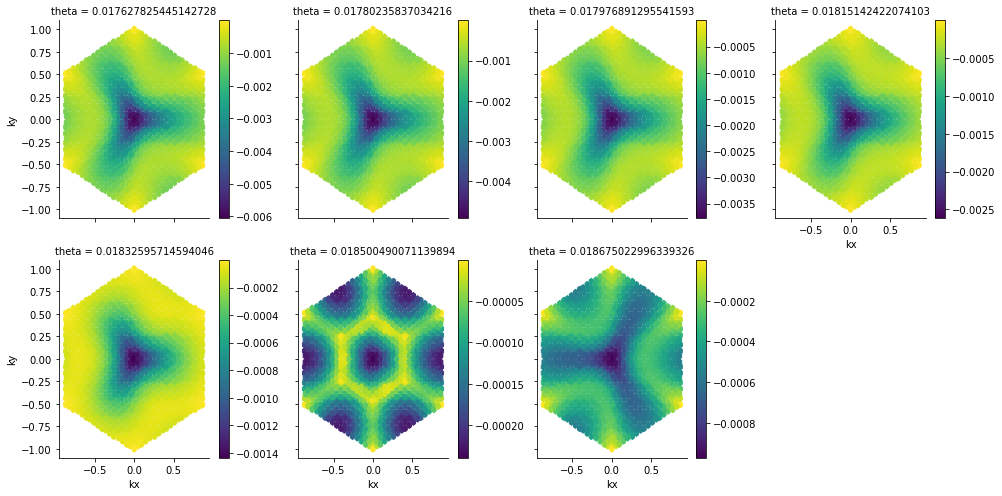

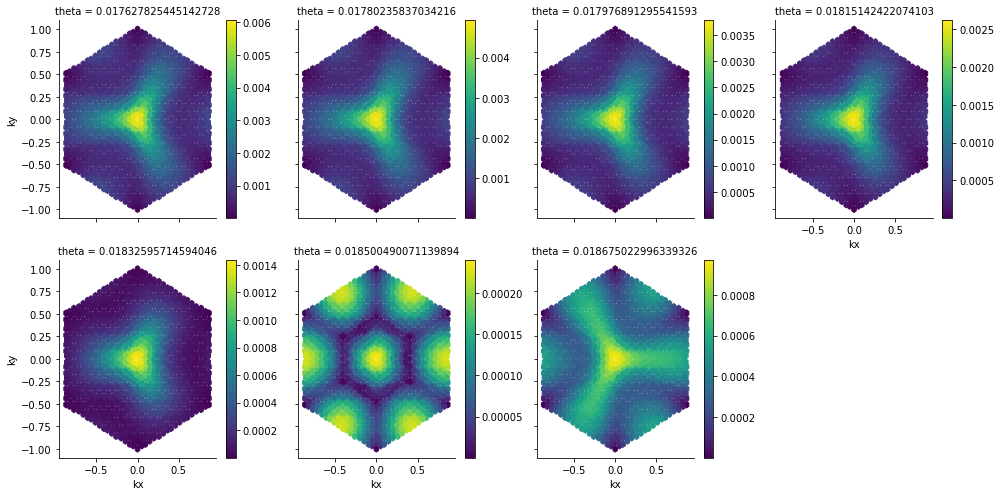

In [21]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', cbar=False, square = True)
# get figure background color


# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', cbar=False, square = True)
# get figure background color




Just plotting the Fermi surfaces one notices the stark difference near magic angle for $\kappa=0.7$ where additional dirac cones appear in the middle of the $\Gamma-K$ line. The bandwidth is also dramatically lower than for nearby twist angles (Almost one order of magnitude lower than neighbouring angles). This is reflected in the Bubbles below

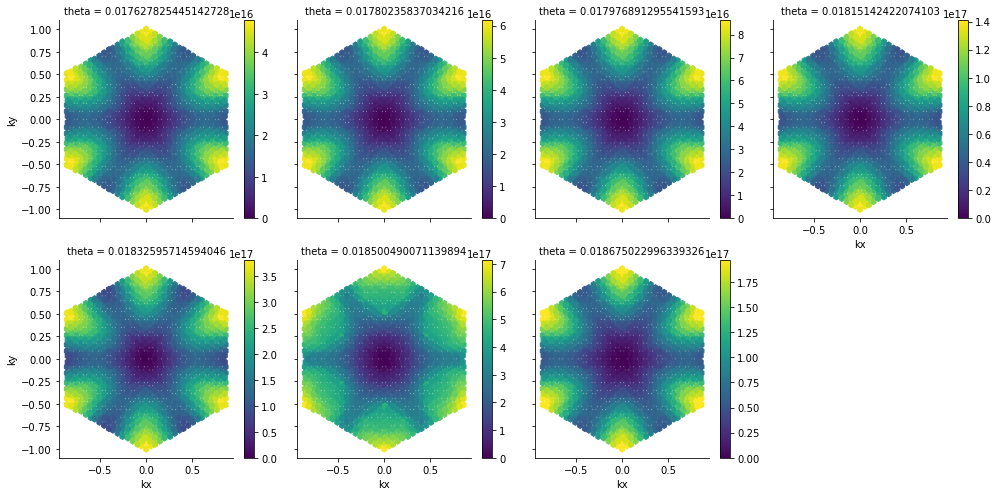

In [22]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color





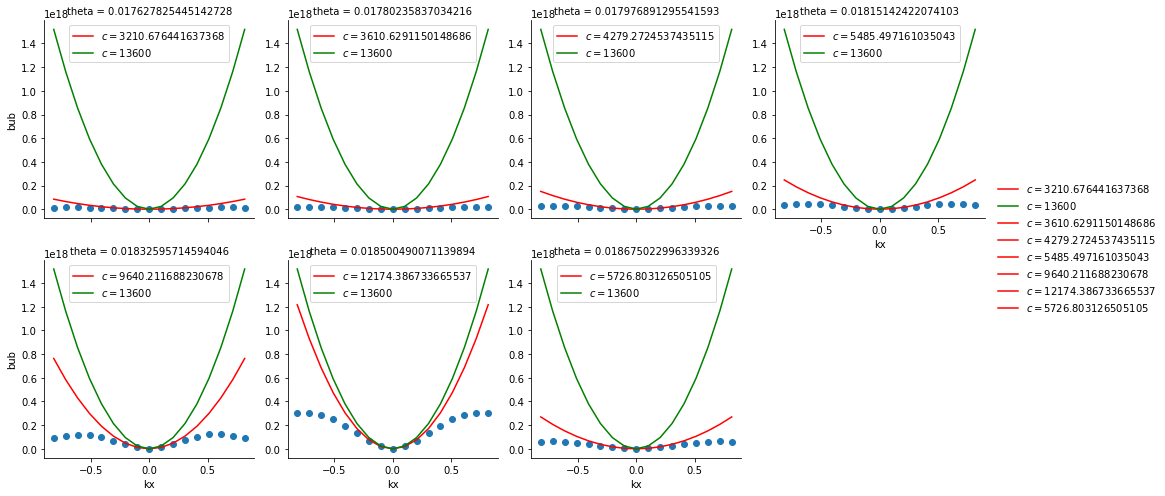

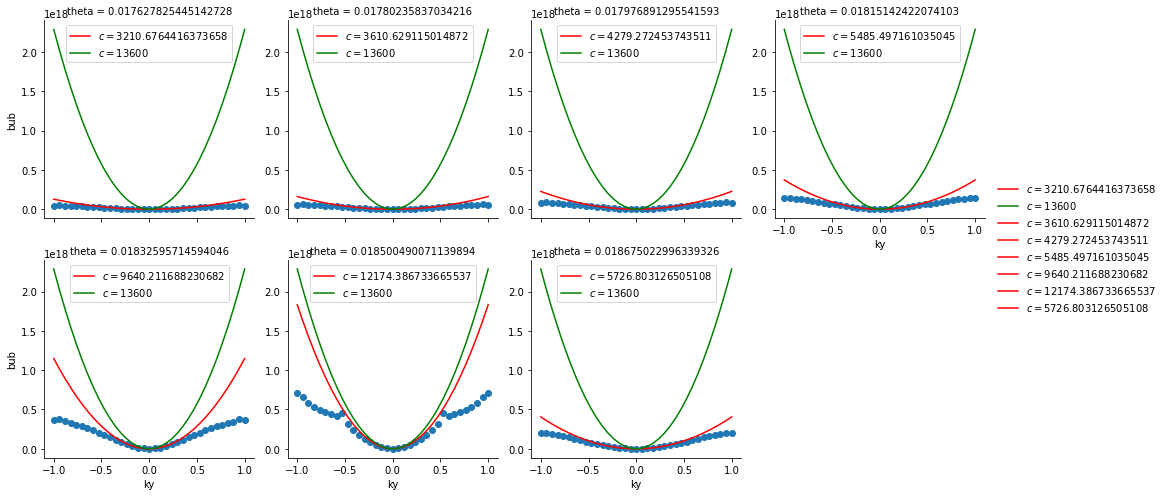

In [23]:

cTrans=13600
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2)
    plt.plot(d1, cons*d1*d1*d3*d3,c='r', label=r'$c=$'+str(d3.mean()))
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
# get figure background color
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2)
    plt.plot(d1, cons*d1*d1*d3*d3,c='r', label=r'$c=$'+str(d3.mean()))
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
# get figure background color
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

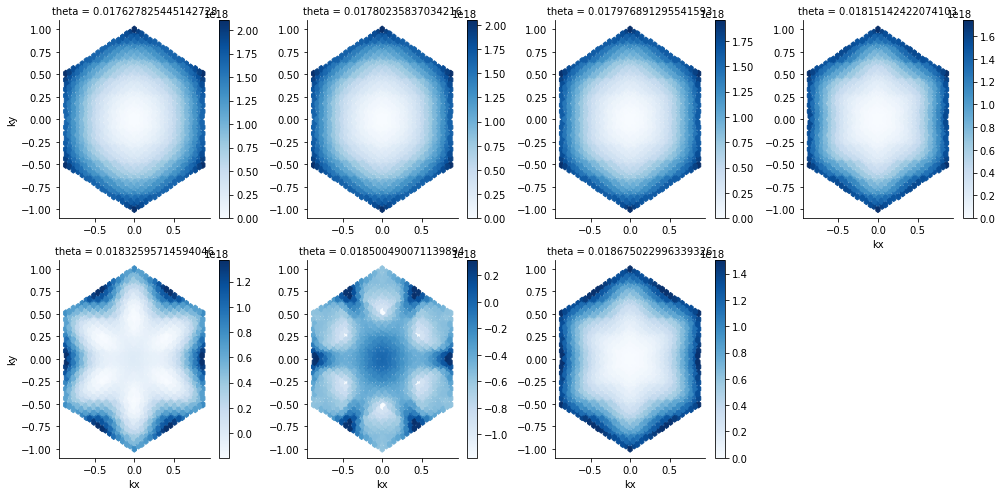

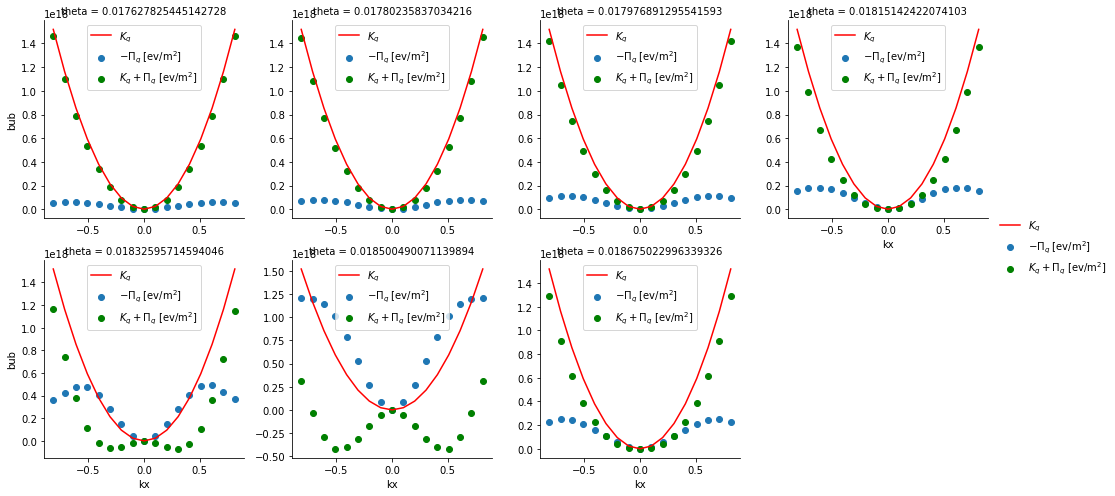

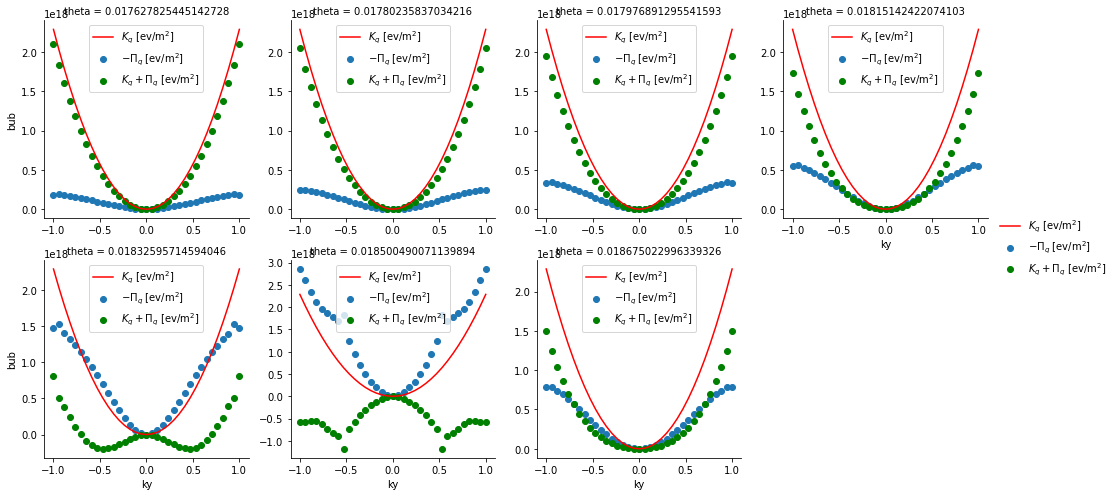

In [24]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
gp2=(2)**2
cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)), cmap=color_map)
    
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4,sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color

In [25]:
df['nu']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18375    3.9
18376    3.9
18377    3.9
18378    3.9
18379    3.9
Name: nu, Length: 128660, dtype: float64